# Pandas -- Love and Hate

If you've never used `pandas` before, it's amazing. It will also frustrate you to tears. 

High level tip -- try to represent data in the proper format: floats as floats; ints as ints; etc. Especially if you have dates, or timestamps, or datetimestamps, keep them in that format. The temptation to operate on them like strings may be overwhelming, but resist! In the long run you might prevail. :\

In [1]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.11 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.0.1
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.10.2
scipy 0.16.1
matplotlib 1.5.1
pandas 0.17.1
Wed Jan 13 19:01:28 2016 PST

In [2]:
# Doing this in python 2.7 code allows for most of the code to be python 3 portable.
# But you have to write your print functions: print("Hello world.")
# from __future__ import division, absolute_import, print_function, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 


import numpy as np
import pandas as pd

/Users/jonathan/miniconda2/envs/insight_py/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [3]:
dframe = pd.read_csv("../data/coal_prod_cleaned.csv")

## Notebook Extensions -- qgrid

In [4]:
# Check out http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb for more (including demo)
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

/Users/jonathan/miniconda2/envs/insight_py/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
dframe.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,102838,4,Independent Producer Operator,2712,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572,NaN,2002
1,103184,5,Independent Producer Operator,2480,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725,NaN,2002
2,100329,55,Operating Subsidiary,123618,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0,United Mine Workers of America,2002
3,100851,331,Operating Subsidiary,748182,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153,United Mine Workers of America,2002
4,102354,28,Independent Producer Operator,55306,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446,NaN,2002


In [6]:
qgrid.show_grid(dframe[['MSHA_ID', 'Year', 'Mine_Name', 'Mine_State', 'Mine_County']], remote_js=True)

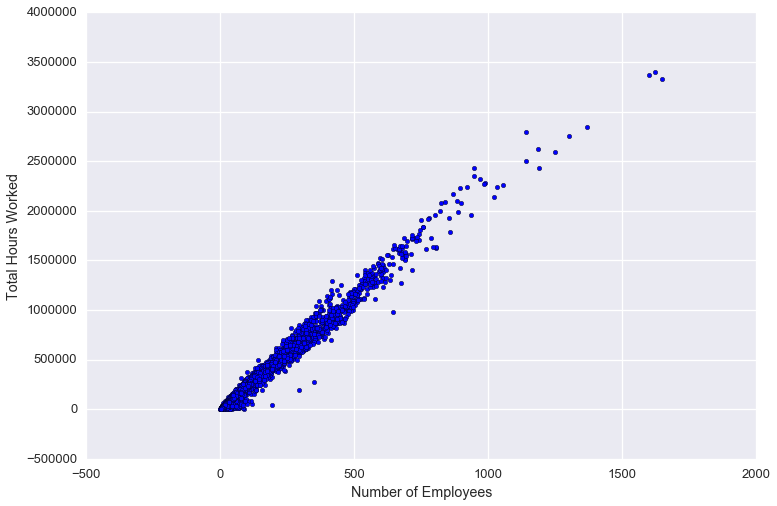

In [7]:
plt.scatter(dframe.Average_Employees, dframe.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

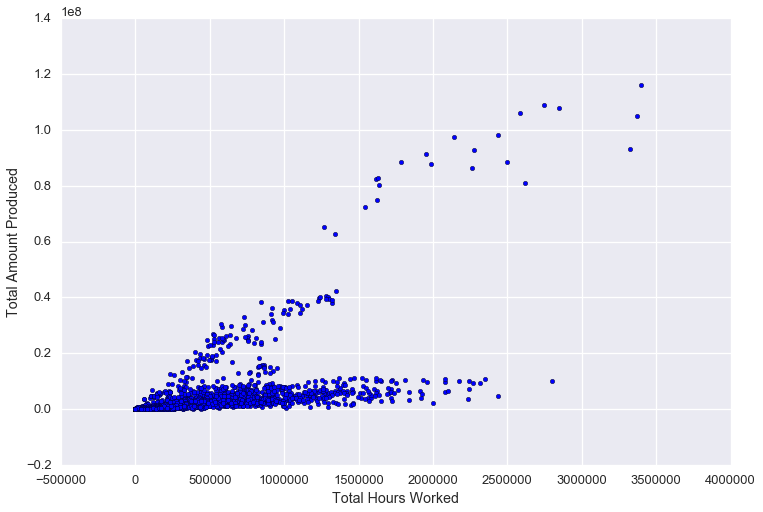

In [8]:
plt.scatter(dframe.Labor_Hours, dframe.Production_short_tons, )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")

In [9]:
colors = sns.color_palette(n_colors=11)

/Users/jonathan/miniconda2/envs/insight_py/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
color_dict = {key: value for key, value in zip(sorted(dframe.Year.unique()), colors)}

In [11]:
color_dict

{2002: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2003: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2004: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2005: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2006: (0.8, 0.7254901960784313, 0.4549019607843137),
 2007: (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 2008: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2009: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2010: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2011: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2012: (0.8, 0.7254901960784313, 0.4549019607843137)}

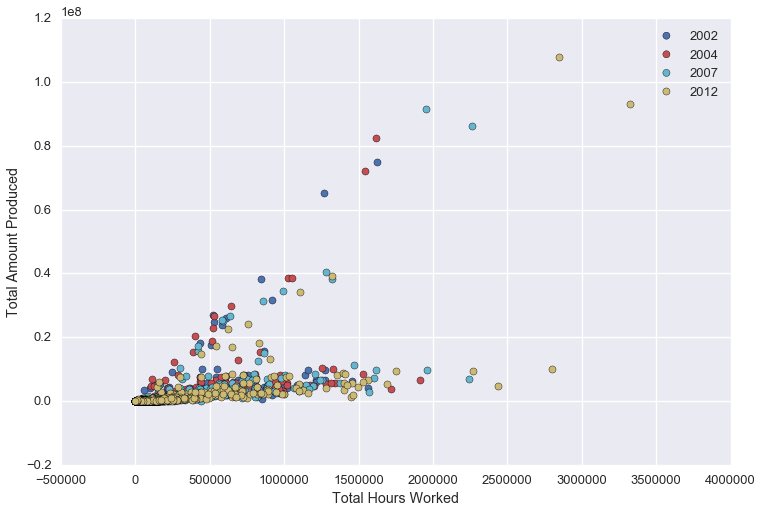

In [12]:
for year in sorted(dframe.Year.unique()[[0,2, 5, -1]]):
    plt.scatter(dframe[dframe.Year == year].Labor_Hours,
                dframe[dframe.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("ex1.png")

In [13]:
# facet grid

In [14]:
for col in dframe.columns:
    print col

MSHA_ID
Average_Employees
Company_Type
Labor_Hours
Mine_Basin
Mine_County
Mine_Name
Mine_State
Mine_Status
Mine_Type
Operating_Company
Operating_Company_Address
Operation_Type
Production_short_tons
Union_Code
Year
